In [1]:
%matplotlib inline
import geopandas as gdp
import eecisc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (7, 14)
plt.rcParams['image.cmap'] = 'Blues'

In [2]:
from enum import IntEnum

class FTC(IntEnum):
    BUILDING = 1
    MAN_MADE_SURFACE_AREA = 2
    NATURAL_AREA_LOW_VEGETATION = 3
    WATER = 4
    MAN_MADE_STRUCTURE_NOT_BUILDING = 5
    NATURAL_AREA_SCATTERED_TREES = 6
    NATURAL_AREA_PREDOMINANTLY_TREES = 7
    NON_GEOGRAPHIC_ENTITY = 9
    
class FCC1(IntEnum):
    AGRICULTURE_AND_FISHERIES = 11
    COMMUNITY_AND_HEALTH_SERVICES = 12
    DEFENCE = 13
    EDUCATION_PLACES = 14
    RECREATION_AND_LEISURE = 15
    MANUFACTURING = 16
    MINERAL_EXTRACTION = 17
    OFFICES = 18
    RESIDENCES = 19
    RETAIL_DISTRIBUTION = 20
    STORAGE = 21
    TRANSPORT_TRACKS_AND_PLACES = 22
    UNUSED_LAND_WATER_AND_BUILDINGS = 23
    UTILITY_SERVICES = 24
    WHOLESALE_DISTRIBUTION = 25
    UNKNOWN = 99

In [3]:
## some tests
assert FTC(4) == FTC.WATER
assert FCC1(19) == FCC1.RESIDENCES
assert FCC1(99) == FCC1.UNKNOWN

## Read in Shape File

In [4]:
data = eecisc.read_shapefile('/notebooks/HB0115_UKMap_Topo_Base_Tables.shp')

User name on eecisc: tt397
Password: ········


In [5]:
data.head()

,ADF10,ADF11,ADF12,ADF13,ADF14,ADF15,ADF16,ADF17,ADF18,ADF19,...,SHAPE_Area,SHAPE_Leng,SHD,SRC,Shape_Area,Shape_Leng,TPI,UCC,fme_featur,geometry
0,None,None,None,None,None,None,None,None,0.0,None,...,48.06530,None,0,10001.0,None,None,0,0.0,None,POLYGON Z ((504053.0900000362 174342.879999627...
1,HITHERMOOR CLOSE,None,None,STAINES,SURREY,ENGLAND,TW196BD,None,0.0,S,...,62.64180,None,1,90002.0,None,None,0,0.0,None,POLYGON Z ((504092.2200000362 174343.129999629...
2,None,None,None,None,None,None,None,None,0.0,None,...,4.78775,None,1,90001.0,None,None,0,0.0,None,POLYGON Z ((504224.6600000368 174575.779999626...
3,None,None,None,None,None,None,None,None,0.0,None,...,3.31105,None,0,10001.0,None,None,0,0.0,None,POLYGON Z ((504236.3000000365 174779.069999628...
4,None,None,None,None,None,None,None,None,0.0,None,...,651.68630,None,0,10004.0,None,None,0,0.0,None,POLYGON Z ((504768.8400000375 174450.589999626...


In [6]:
data.columns

Index(['ADF10', 'ADF11', 'ADF12', 'ADF13', 'ADF14', 'ADF15', 'ADF16', 'ADF17',
       'ADF18', 'ADF19', 'ADF2', 'ADF3', 'ADF4', 'ADF5', 'ADF6', 'ADF7',
       'ADF8', 'ADF9', 'ART', 'ASC', 'CAP', 'CDA', 'CHB', 'DFE', 'DPI', 'FCC1',
       'FCC2', 'FCC3', 'FCC4', 'FTC', 'GET', 'GTN', 'HBB', 'HTB', 'NPI',
       'OBJECTID', 'RCC', 'RNC', 'SHAPE_Area', 'SHAPE_Leng', 'SHD', 'SRC',
       'Shape_Area', 'Shape_Leng', 'TPI', 'UCC', 'fme_featur', 'geometry'],
      dtype='object')

In [7]:
buildings = data[data.FTC == FTC.BUILDING]

## Filter and Map Data

### Map entire data set

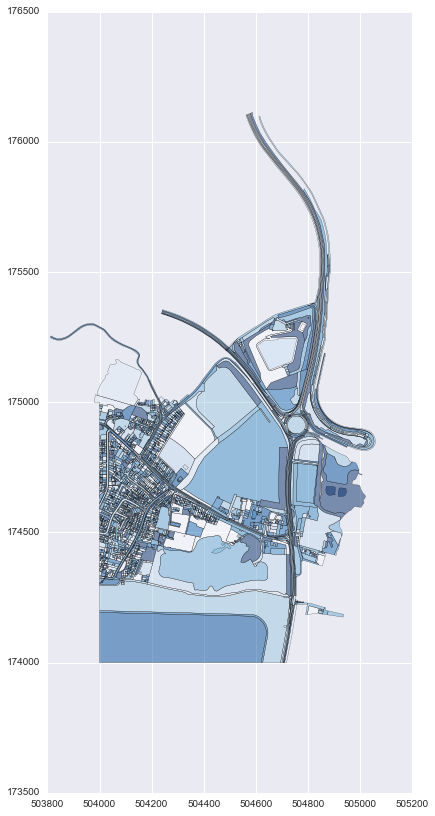

In [8]:
data.plot(linewidth=0.2)

### Filter for water features and map those

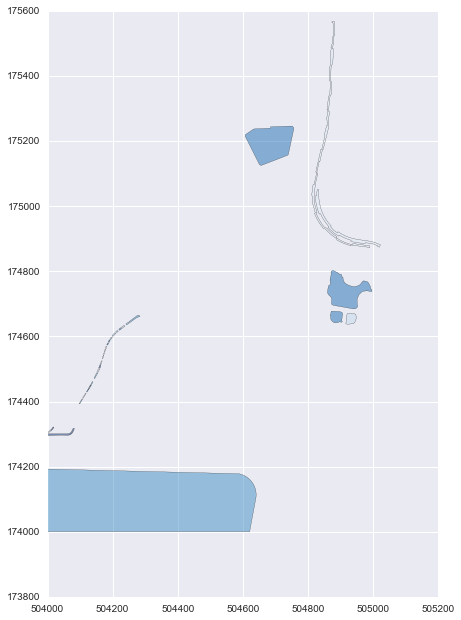

In [9]:
data[data.FTC == FTC.WATER].plot(linewidth=0.2)

### Filter for buildings and map those

In [10]:
buildings = data[data.FTC == FTC.BUILDING]

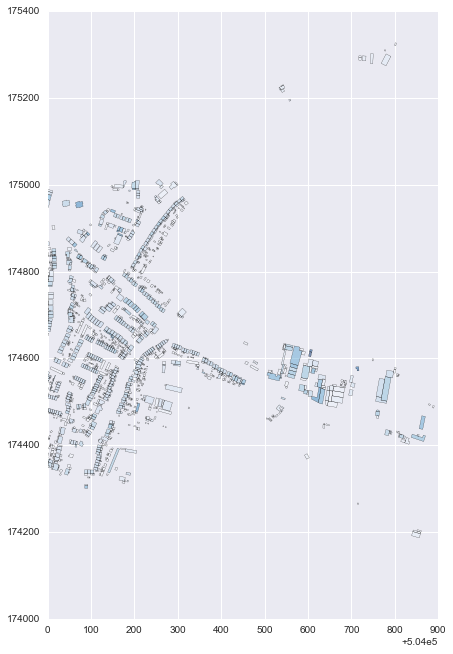

In [11]:
buildings.plot(linewidth=0.2, column='CHB')

## Analze Building Heights

In [12]:
buildings.CHB.mean()

5.1011509817197016

The average height of a building in this tile is 5.1m. Now plot all buildings that are higher than the average.

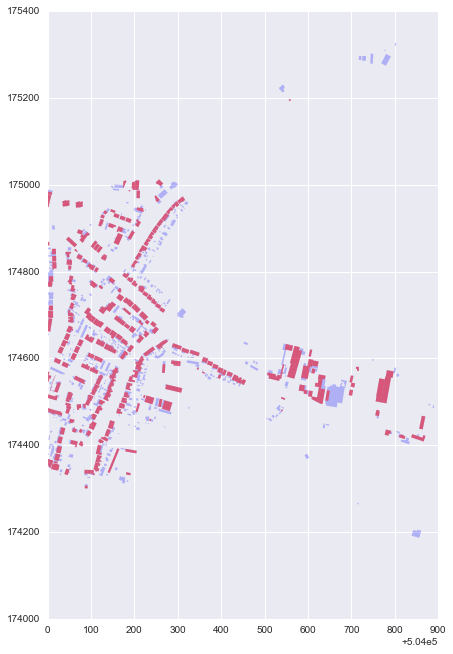

In [13]:
base_layer = buildings.plot(alpha=0.25, linewidth=0, color='b')
buildings[buildings.CHB > buildings.CHB.mean()].plot(ax=base_layer, color='r', linewidth=0)

The above plot shows all buildings heigher than the average in red, and all other buildings in light blue.

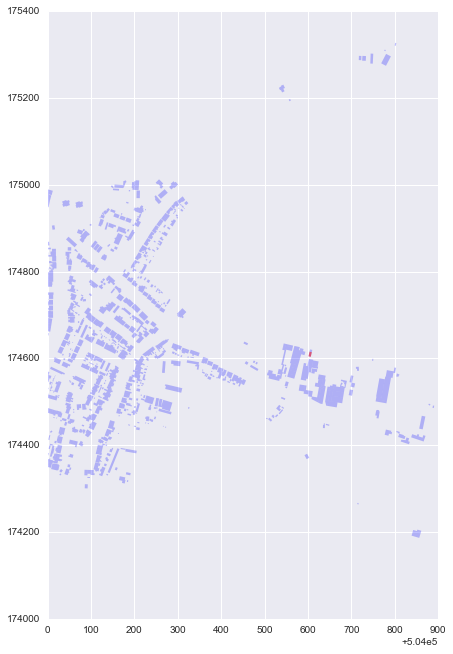

In [14]:
base_layer = buildings.plot(alpha=0.25, linewidth=0, color='b')
buildings[buildings.CHB == buildings.CHB.max()].plot(ax=base_layer, color='r', linewidth=0)

The above plot shows the tallest building in red, all other buildings in light blue.

### Analysing distribution of building heights

#### All Buildings

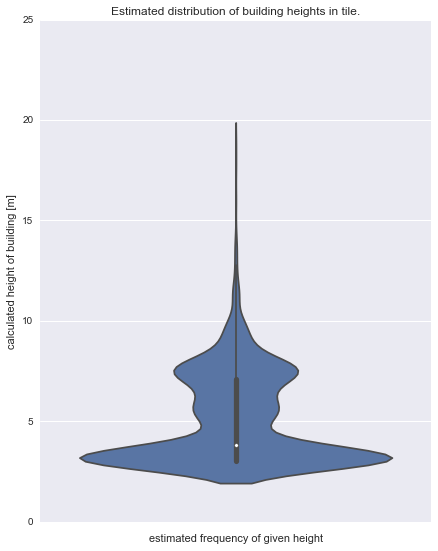

In [15]:
fig = plt.figure(figsize=(7,9))
sns.violinplot(buildings.CHB, orient='v')
plt.title('Estimated distribution of building heights in tile.')
plt.ylabel('calculated height of building [m]')
plt.xlabel('estimated frequency of given height')

#### By Building Type

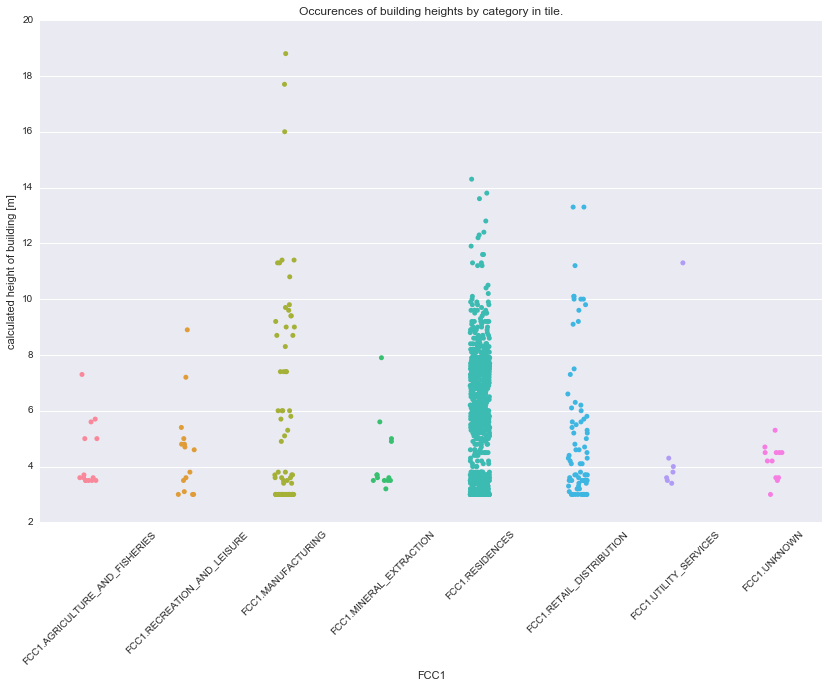

In [16]:
fig = plt.figure(figsize=(14,9))
sns.stripplot(x="FCC1", y="CHB", data=buildings, jitter=True)
plt.title('Occurences of building heights by category in tile.')
plt.ylabel('calculated height of building [m]')
labels = fig.gca().set_xticklabels([FCC1(int(label.get_text())) for label in fig.gca().get_xticklabels()])
labels = plt.setp(labels, rotation=45)